In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Results

In [2]:
# file_name = './CWoLa_Hunting_Hidden_Valley_training_results.csv'
file_name = './CWoLa_Hunting_Hidden_Valley_training_results-2.csv'
df = pd.read_csv(file_name)

In [3]:
def realistic_sensitivity(S, B):
    return np.sqrt(2 * (S + B) * np.log(1 + S/B) - 2 * S)


def convert_to_realistic_sensitivity(sensitivity, nB=136.1*139):
    nS = sensitivity * nB**0.5
    return realistic_sensitivity(nS, nB) 

In [4]:
# cross-section x luminosity
n_bkg_in_SR = 136.1 * 139


def get_realistic_sensitivity_and_std(model_name_format, sensitivity_range=range(11), s=slice(-10, None)):
    # sensitivities after CWoLa selection with different background efficiencies 10%, 1%, 0.1%
    sensitivities = [[], [], []]
    stds = [[], [], []]

    for i in sensitivity_range:
        model_name = model_name_format.format(i)
        # compute mean value and standard deviation of realistic sensitivity
        for j, fpr in enumerate([0.1, 0.01, 0.001]):
            scale_factor = df[df['Model Name'] == model_name][f'TPR/FPR^0.5: FPR={fpr}'][s]
            real_sensitivities = convert_to_realistic_sensitivity(i * scale_factor, nB=n_bkg_in_SR * fpr)
            sensitivities[j].append(real_sensitivities.mean())
            stds[j].append(real_sensitivities.std())

    return sensitivities, stds


def get_realistic_sensitivity_and_std_from_models(models, sensitivity, s=slice(-10, None)):
    # sensitivities after CWoLa selection with different background efficiencies 10%, 1%, 0.1%
    sensitivities = [[], [], []]
    stds = [[], [], []]

    for model_name in models:
        # compute mean value and standard deviation of realistic sensitivity
        for j, fpr in enumerate([0.1, 0.01, 0.001]):
            scale_factor = df[df['Model Name'] == model_name][f'TPR/FPR^0.5: FPR={fpr}'][s]
            real_sensitivities = convert_to_realistic_sensitivity(sensitivity * scale_factor, nB=n_bkg_in_SR * fpr)
            sensitivities[j].append(real_sensitivities.mean())
            stds[j].append(real_sensitivities.std())

    return sensitivities, stds

## Resolution

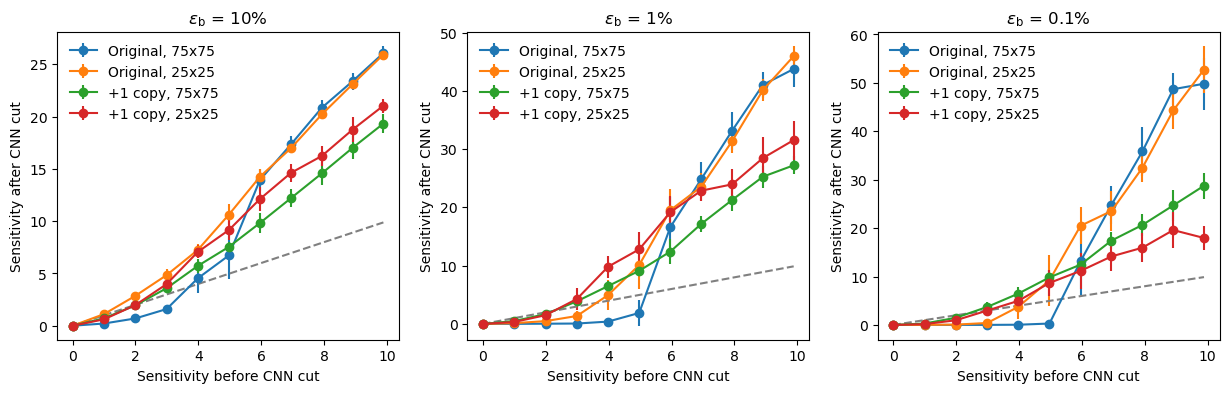

In [7]:
sensitivities_origin_75x75_r, stds_origin_75x75_r = get_realistic_sensitivity_and_std('SB_{:.1f}_no_swap_2_image')
sensitivities_origin_25x25_r, stds_origin_25x25_r = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25')
sensitivities_copy_1_75x75_r, stds_copy_1_75x75_r = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_no_swap_2_image')
sensitivities_copy_1_25x25_r, stds_copy_1_25x25_r = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_75x75_r[i], yerr=stds_origin_75x75_r[i], marker='o', label='Original, 75x75')
    ax[i].errorbar(sensitivities, sensitivities_origin_25x25_r[i], yerr=stds_origin_25x25_r[i], marker='o', label='Original, 25x25')

    ax[i].errorbar(sensitivities, sensitivities_copy_1_75x75_r[i], yerr=stds_copy_1_75x75_r[i], marker='o', label='+1 copy, 75x75')
    ax[i].errorbar(sensitivities, sensitivities_copy_1_25x25_r[i], yerr=stds_copy_1_25x25_r[i], marker='o', label='+1 copy, 25x25')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

# plt.savefig('../figures/HVmodel_sensitivity_improvement_bkg_eff_origin_copy_1_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

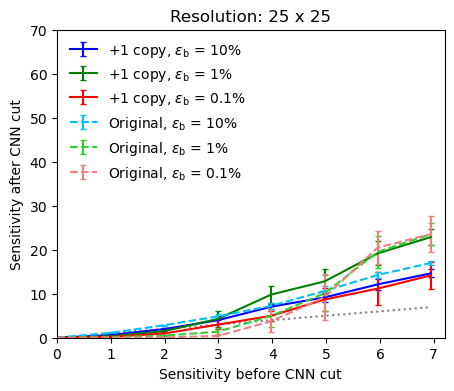

In [6]:
sensitivities_origin_25x25_r, stds_origin_25x25_r = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25', range(8))
sensitivities_copy_1_25x25_r, stds_copy_1_25x25_r = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25', range(8))
sensitivities = convert_to_realistic_sensitivity(np.arange(8), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 1, figsize=(5,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
colors = ['b', 'deepskyblue', 'g', 'limegreen', 'r', 'lightcoral']

for i in range(3):
    ax.errorbar(sensitivities, sensitivities_copy_1_25x25_r[i], yerr=stds_copy_1_25x25_r[i], marker='', capsize=2, color=colors[2*i], linestyle='-', label='+1 copy, ' + titles[i])

for i in range(3):
    ax.errorbar(sensitivities, sensitivities_origin_25x25_r[i], yerr=stds_origin_25x25_r[i], marker='', capsize=2, color=colors[2*i+1], linestyle='--', label='Original, ' + titles[i])

ax.plot(sensitivities, sensitivities, ':', color='grey')

ax.set_title('Resolution: 25 x 25')

ax.set_xlim(0, 7.2)
ax.set_ylim(0, 70)    
ax.set_xlabel('Sensitivity before CNN cut')
ax.set_ylabel('Sensitivity after CNN cut')

ax.legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_bkg_eff_origin_copy_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

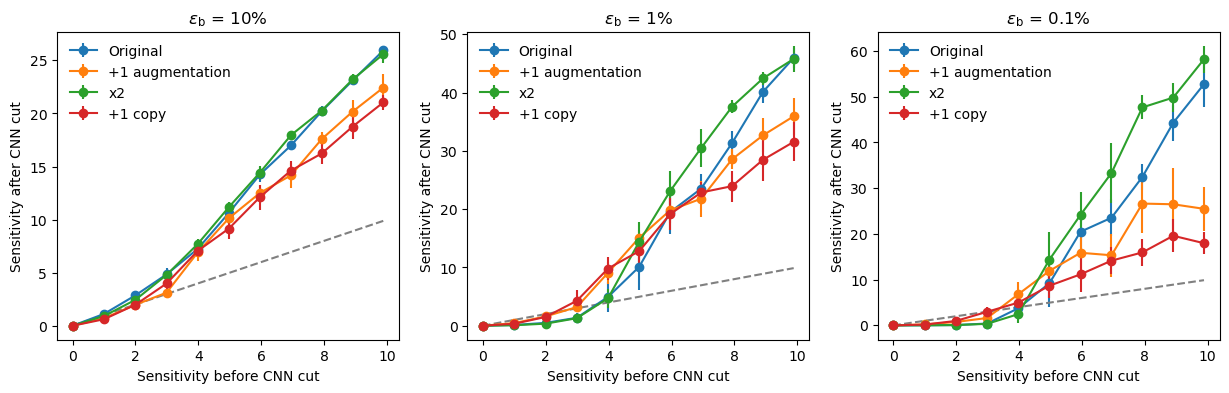

In [7]:
sensitivities_origin_25x25, stds_origin_25x25 = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25')
sensitivities_aug_1_25x25, stds_aug_1_25x25 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_2_image_25x25')
sensitivities_x2_25x25, stds_x2_25x25 = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_2_image_25x25')
sensitivities_copy_1_25x25, stds_copy_1_25x25 = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_25x25[i], yerr=stds_origin_25x25[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1_25x25[i], yerr=stds_aug_1_25x25[i], marker='o', label='+1 augmentation')
    ax[i].errorbar(sensitivities, sensitivities_x2_25x25[i], yerr=stds_x2_25x25[i], marker='o', label='x2')
    ax[i].errorbar(sensitivities, sensitivities_copy_1_25x25[i], yerr=stds_copy_1_25x25[i], marker='o', label='+1 copy')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_aug_1_x2_copy_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Batchnormalization layer

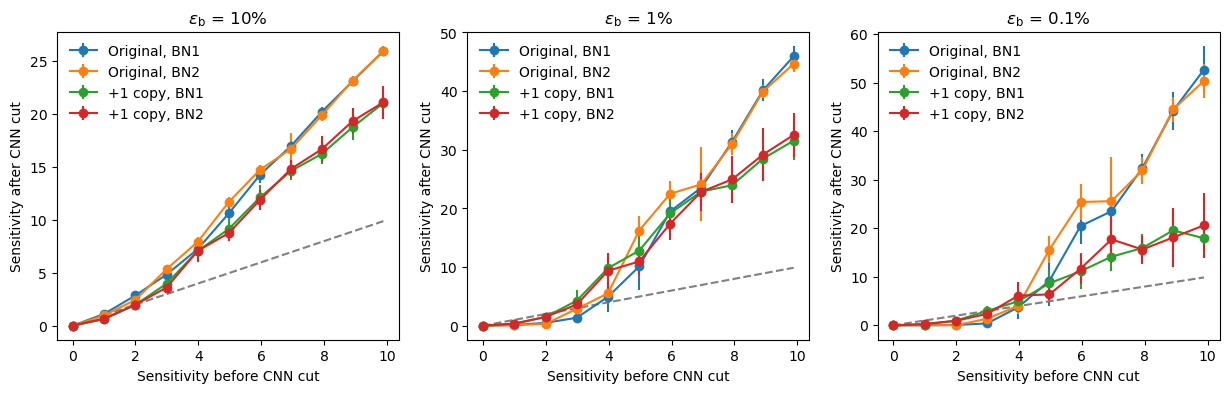

In [5]:
sensitivities_origin_BN1, stds_origin_BN1 = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25')
sensitivities_origin_BN2, stds_origin_BN2 = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25_BN')
sensitivities_copy_1_BN1, stds_copy_1_BN1 = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25')
sensitivities_copy_1_BN2, stds_copy_1_BN2 = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25_BN')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_BN1[i], yerr=stds_origin_BN1[i], marker='o', label='Original, BN1')
    ax[i].errorbar(sensitivities, sensitivities_origin_BN2[i], yerr=stds_origin_BN2[i], marker='o', label='Original, BN2')

    ax[i].errorbar(sensitivities, sensitivities_copy_1_BN1[i], yerr=stds_copy_1_BN1[i], marker='o', label='+1 copy, BN1')
    ax[i].errorbar(sensitivities, sensitivities_copy_1_BN2[i], yerr=stds_copy_1_BN2[i], marker='o', label='+1 copy, BN2')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_bkg_eff_origin_copy_1_batch_norm.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## SB region: 4400-4700 5500-5800 GeV

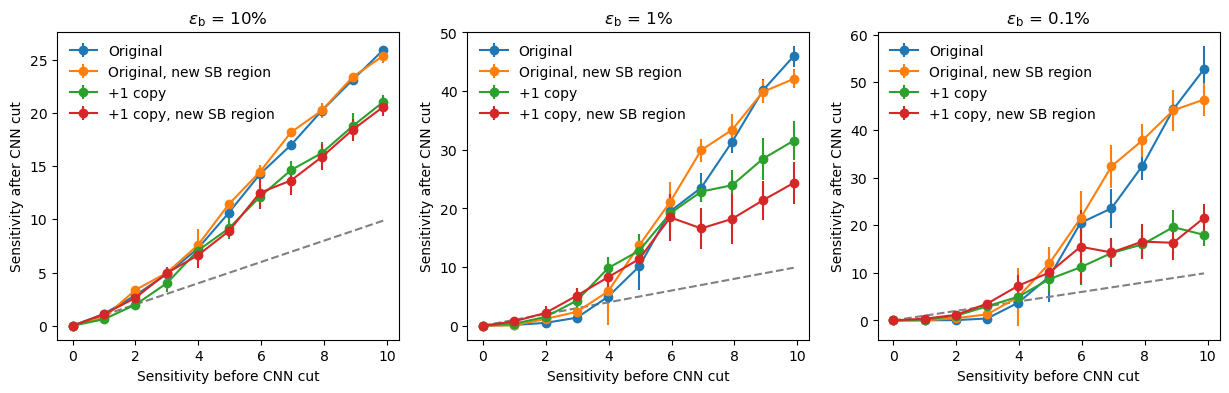

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25')
sensitivities_origin_new_SB, stds_origin_new_SB = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25_new_SB')
sensitivities_copy_1, stds_copy_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25')
sensitivities_copy_1_new_SB, stds_copy_1_new_SB = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25_new_SB')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_origin_new_SB[i], yerr=stds_origin_new_SB[i], marker='o', label='Original, new SB region')
    ax[i].errorbar(sensitivities, sensitivities_copy_1[i], yerr=stds_copy_1[i], marker='o', label='+1 copy')
    ax[i].errorbar(sensitivities, sensitivities_copy_1_new_SB[i], yerr=stds_copy_1_new_SB[i], marker='o', label='+1 copy, new SB region')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_copy_1_new_SB.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Split validation dataset first

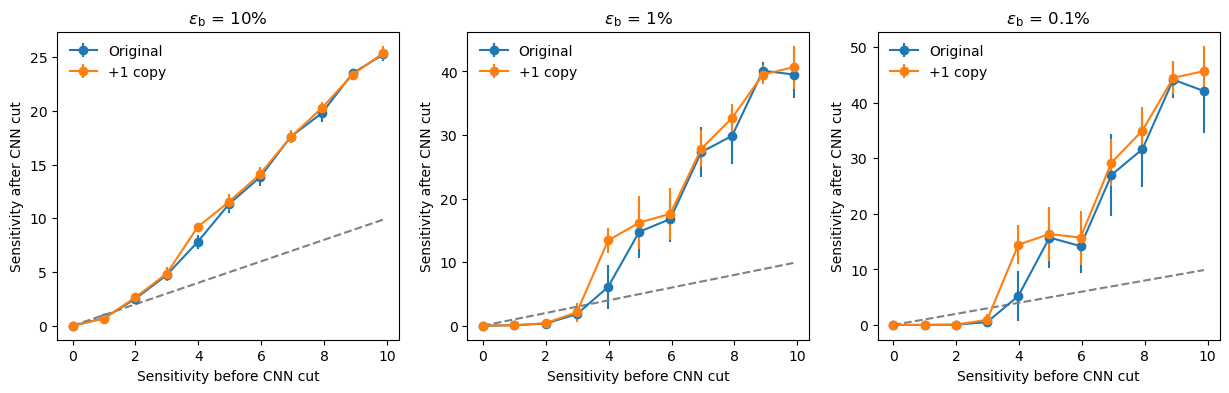

In [5]:
sensitivities_origin_split_val, stds_origin_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_2_image_25x25_split_val')
sensitivities_copy_1_split_val, stds_copy_1_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_copy_1_2_image_25x25_split_val')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_split_val[i], yerr=stds_origin_split_val[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_copy_1_split_val[i], yerr=stds_copy_1_split_val[i], marker='o', label='+1 copy')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_copy_1_split_val.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## New Process flow

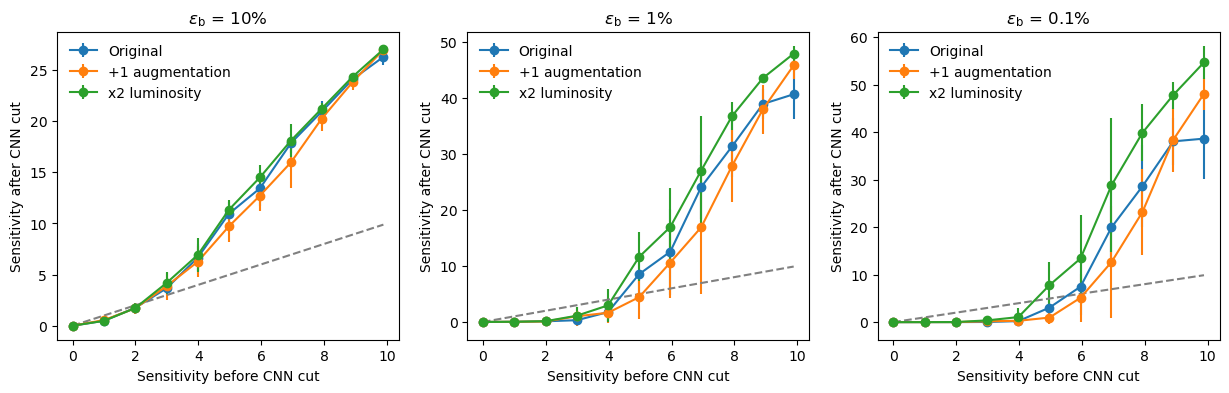

In [5]:
sensitivities_origin_split_val, stds_origin_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug_1_split_val, stds_aug_1_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_x2_split_val, stds_x2_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_split_val[i], yerr=stds_origin_split_val[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1_split_val[i], yerr=stds_aug_1_split_val[i], marker='o', label='+1 augmentation')
    ax[i].errorbar(sensitivities, sensitivities_x2_split_val[i], yerr=stds_x2_split_val[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_aug_1_x2_split_val_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

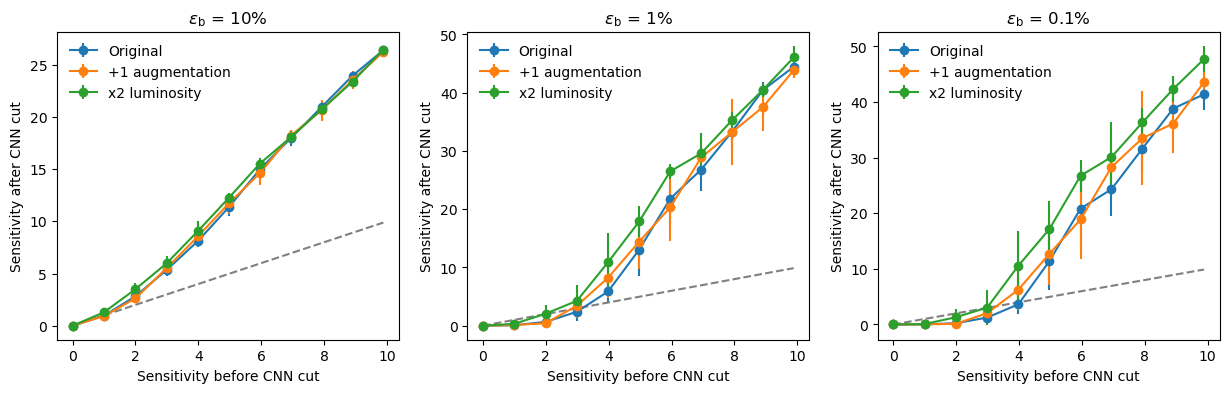

In [6]:
sensitivities_origin_split_val, stds_origin_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug_1_split_val, stds_aug_1_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_x2_split_val, stds_x2_split_val = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin_split_val[i], yerr=stds_origin_split_val[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1_split_val[i], yerr=stds_aug_1_split_val[i], marker='o', label='+1 augmentation')
    ax[i].errorbar(sensitivities, sensitivities_x2_split_val[i], yerr=stds_x2_split_val[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_aug_1_x2_split_val_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Smearing scale

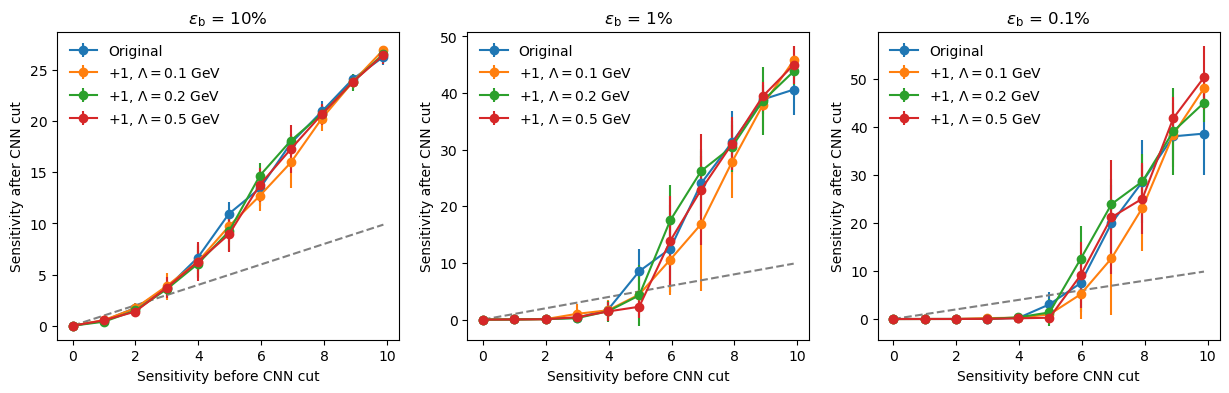

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_01, stds_01 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_02, stds_02 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_02_75x75')
sensitivities_05, stds_05 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_05_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_01[i], yerr=stds_01[i], marker='o', label='+1, $\Lambda=0.1$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_02[i], yerr=stds_02[i], marker='o', label='+1, $\Lambda=0.2$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_05[i], yerr=stds_05[i], marker='o', label='+1, $\Lambda=0.5$ GeV')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_aug_1_std_01_02_05_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

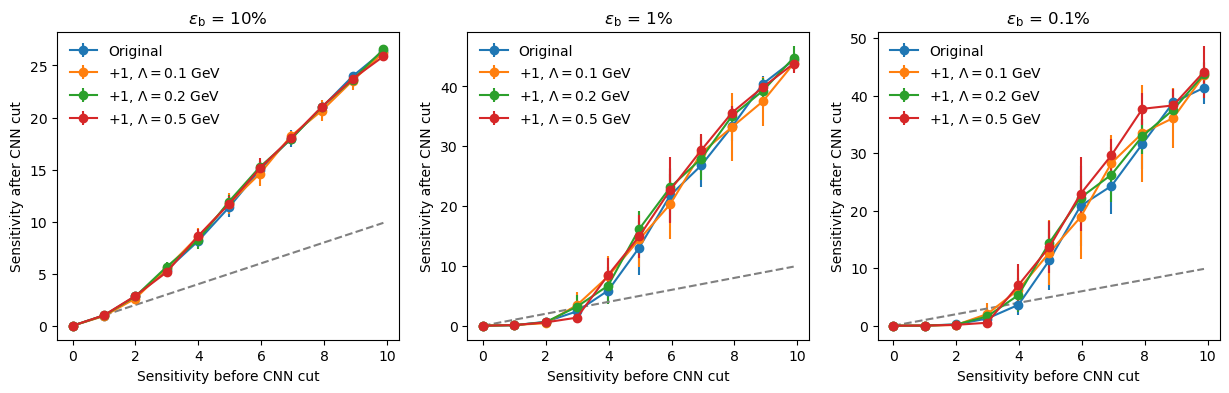

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_01, stds_01 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_02, stds_02 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_02_25x25')
sensitivities_05, stds_05 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_std_05_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_01[i], yerr=stds_01[i], marker='o', label='+1, $\Lambda=0.1$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_02[i], yerr=stds_02[i], marker='o', label='+1, $\Lambda=0.2$ GeV')
    ax[i].errorbar(sensitivities, sensitivities_05[i], yerr=stds_05[i], marker='o', label='+1, $\Lambda=0.5$ GeV')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_aug_1_std_01_02_05_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $p_\text{T}$ smearing

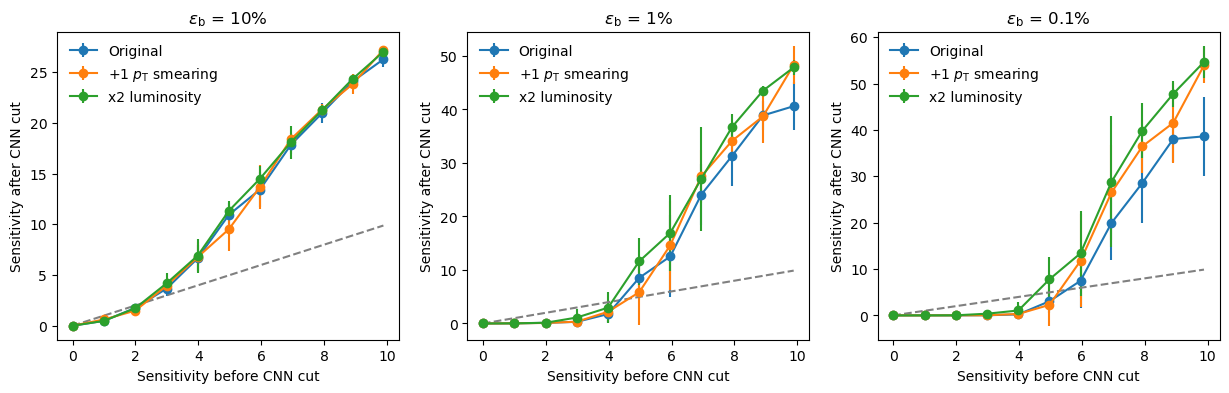

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug, stds_aug = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_75x75')
sensitivities_x2, stds_x2 = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug[i], yerr=stds_aug[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_x2[i], yerr=stds_x2[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_x2_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

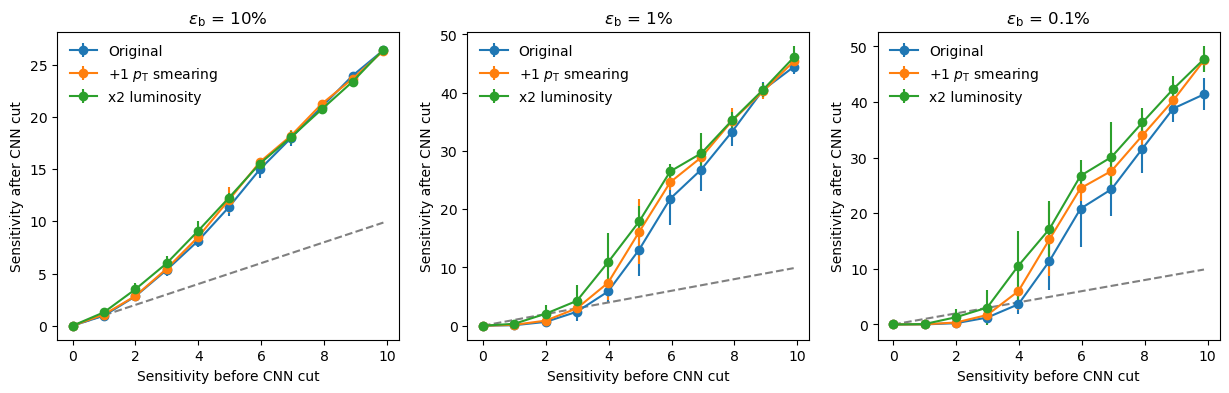

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug, stds_aug = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_x2, stds_x2 = get_realistic_sensitivity_and_std('SB_{:.1f}_x2_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug[i], yerr=stds_aug[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_x2[i], yerr=stds_x2[i], marker='o', label='x2 luminosity')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_x2_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## More augmented sample

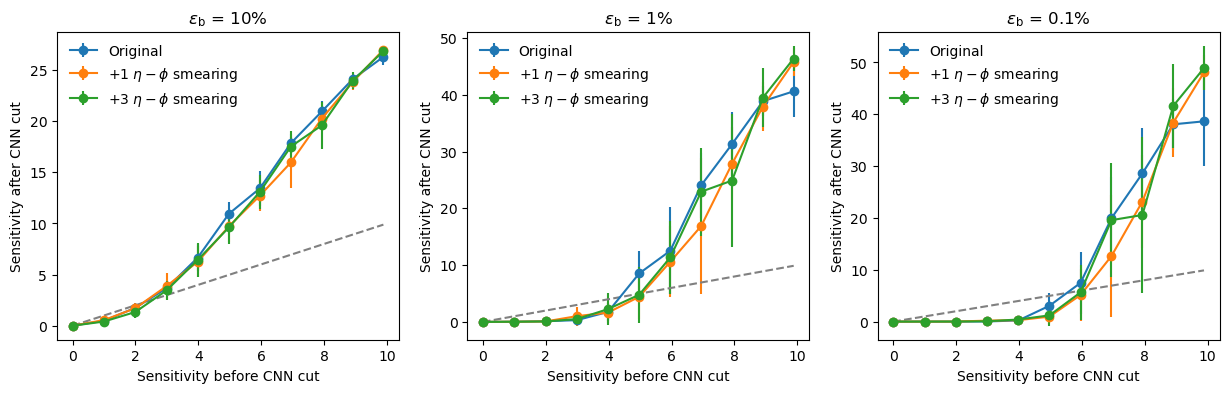

In [11]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_aug_1_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

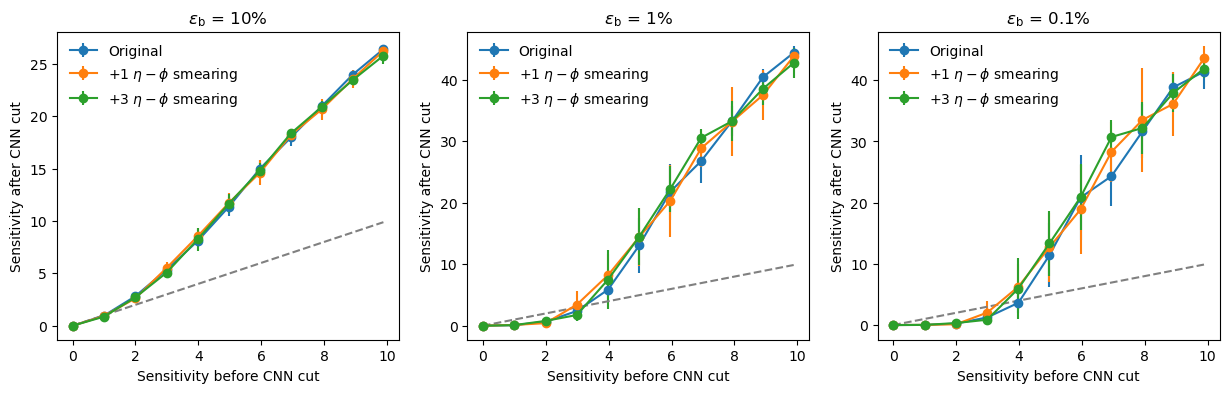

In [12]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_aug_1_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

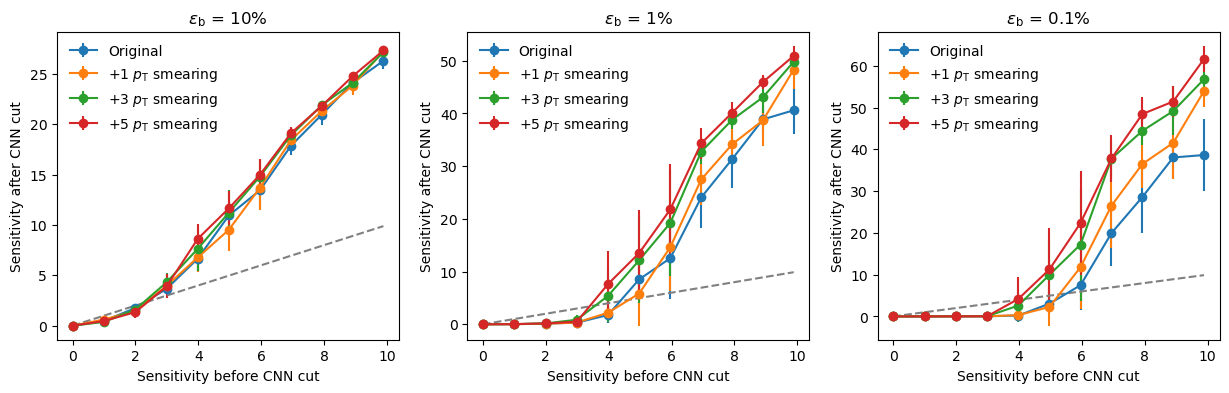

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_75x75')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_75x75')
sensitivities_aug_5, stds_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_5_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_5[i], yerr=stds_aug_5[i], marker='o', label='+5 $p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_3_5_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

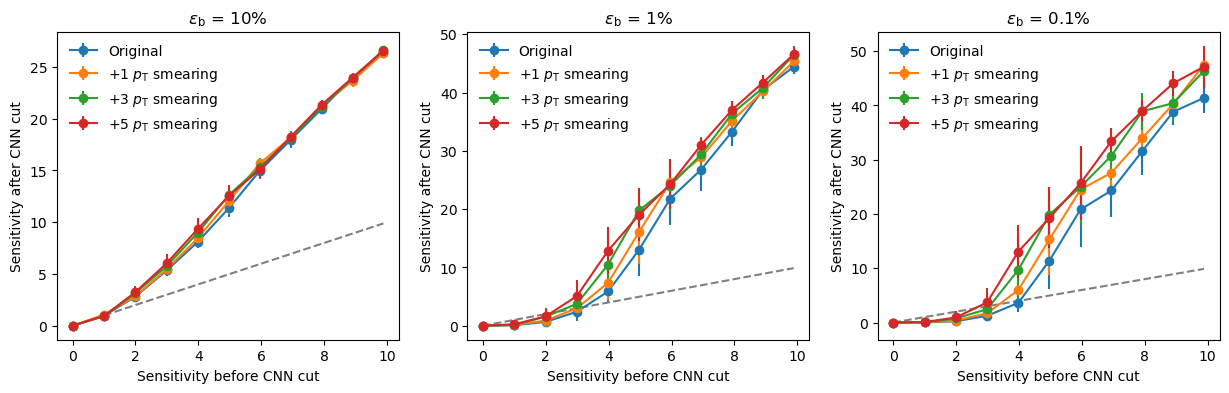

In [8]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_aug_1, stds_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_aug_3, stds_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_25x25')
sensitivities_aug_5, stds_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_5_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_aug_1[i], yerr=stds_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_3[i], yerr=stds_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_aug_5[i], yerr=stds_aug_5[i], marker='o', label='+5 $p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_aug_1_3_5_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $\eta-\phi$ + $p_\text{T}$ smearing

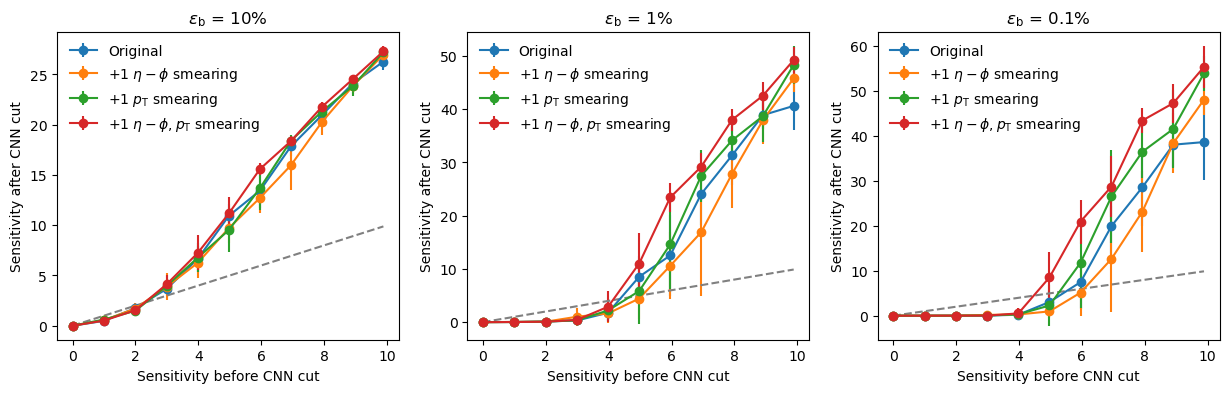

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_eta_phi_aug_1, stds_eta_phi_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_75x75')
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_75x75')
sensitivities_all_aug_1, stds_all_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_1_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_1[i], yerr=stds_eta_phi_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_1[i], yerr=stds_all_aug_1[i], marker='o', label='+1 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_1_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

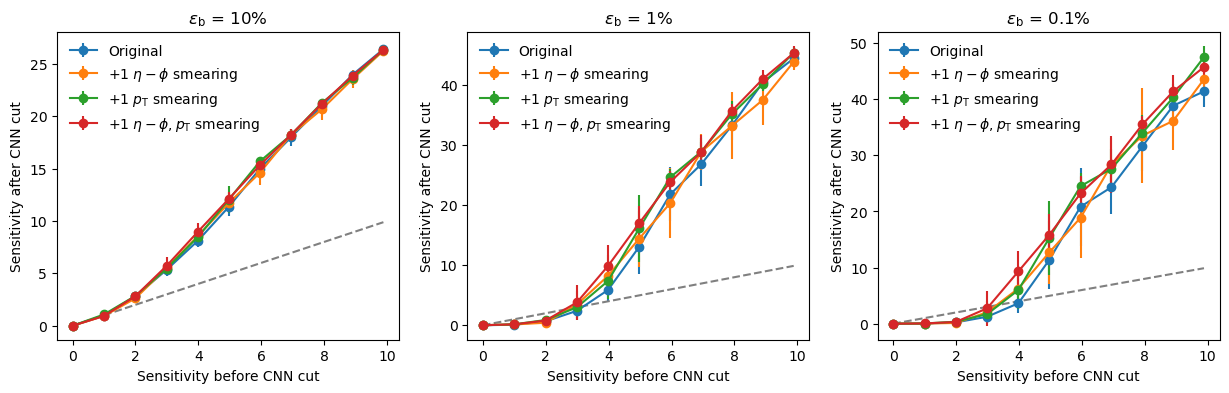

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_eta_phi_aug_1, stds_eta_phi_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_1_25x25')
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_all_aug_1, stds_all_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_1_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_1[i], yerr=stds_eta_phi_aug_1[i], marker='o', label='+1 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_1[i], yerr=stds_all_aug_1[i], marker='o', label='+1 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

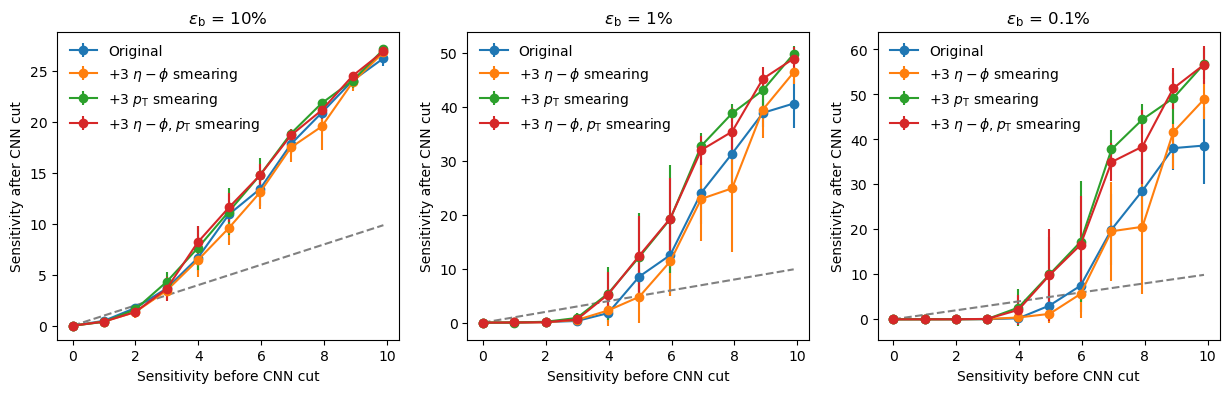

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_eta_phi_aug_3, stds_eta_phi_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_75x75')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_75x75')
sensitivities_all_aug_3, stds_all_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_3_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_3[i], yerr=stds_eta_phi_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_3[i], yerr=stds_all_aug_3[i], marker='o', label='+3 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

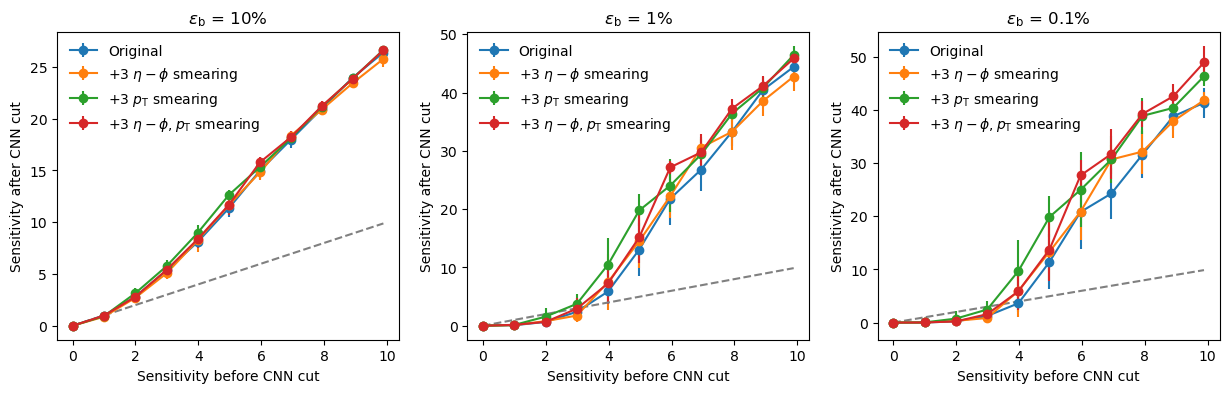

In [8]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_eta_phi_aug_3, stds_eta_phi_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_aug_3_25x25')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_25x25')
sensitivities_all_aug_3, stds_all_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_eta_phi_pt_aug_3_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15,4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_eta_phi_aug_3[i], yerr=stds_eta_phi_aug_3[i], marker='o', label='+3 $\eta-\phi$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_all_aug_3[i], yerr=stds_all_aug_3[i], marker='o', label='+3 $\eta-\phi, p_\mathrm{T}$ smearing')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_eta_phi_pt_aug_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## Jet rotation

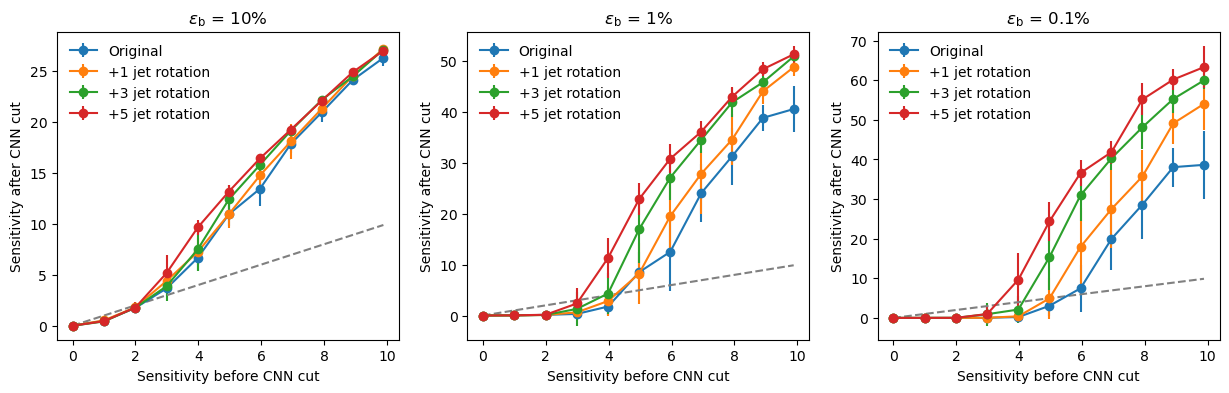

In [13]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_1_75x75')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_75x75')
sensitivities_jet_aug_5, stds_jet_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_5_75x75')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='+1 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_5[i], yerr=stds_jet_aug_5[i], marker='o', label='+5 jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_jet_aug_1_3_5_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

(3, 11)


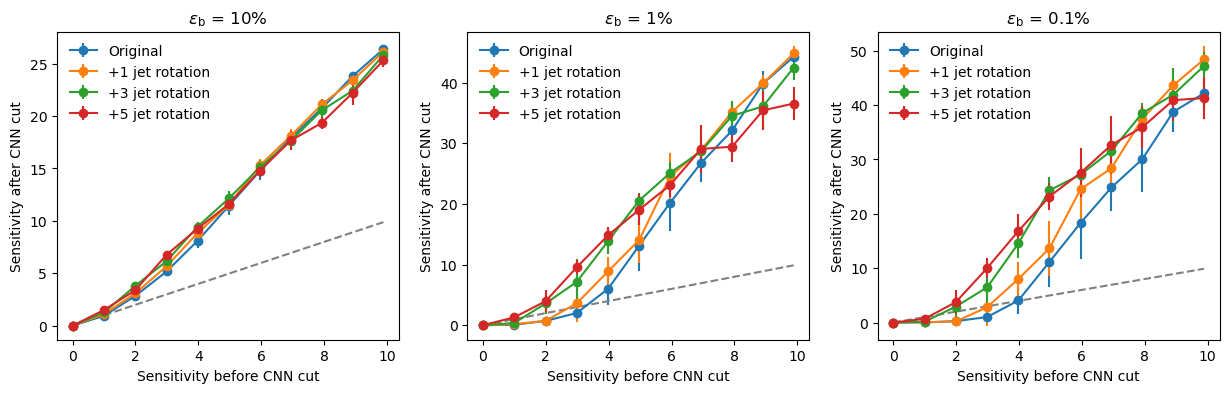

In [13]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_1_25x25')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')
sensitivities_jet_aug_5, stds_jet_aug_5 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_5_25x25')

sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)
print(np.array(sensitivities_jet_aug_3).shape)
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='+1 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_5[i], yerr=stds_jet_aug_5[i], marker='o', label='+5 jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_jet_aug_1_3_5_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

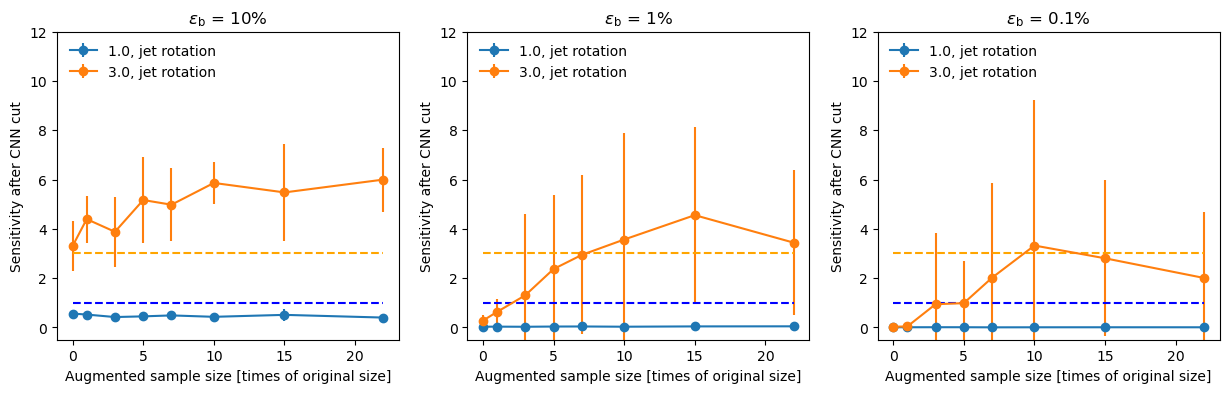

In [5]:
sample_size = [1, 3, 5, 7, 10, 15, 22]

models = ['SB_1.0_75x75'] + [f'SB_1.0_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_75x75'] + [f'SB_3.0_jet_aug_{n}_75x75' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='1.0, jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='3.0, jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 22, color='b', linestyle='--')
    ax[i].hlines(3, 0, 22, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 12)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_jet_aug_SB_1_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

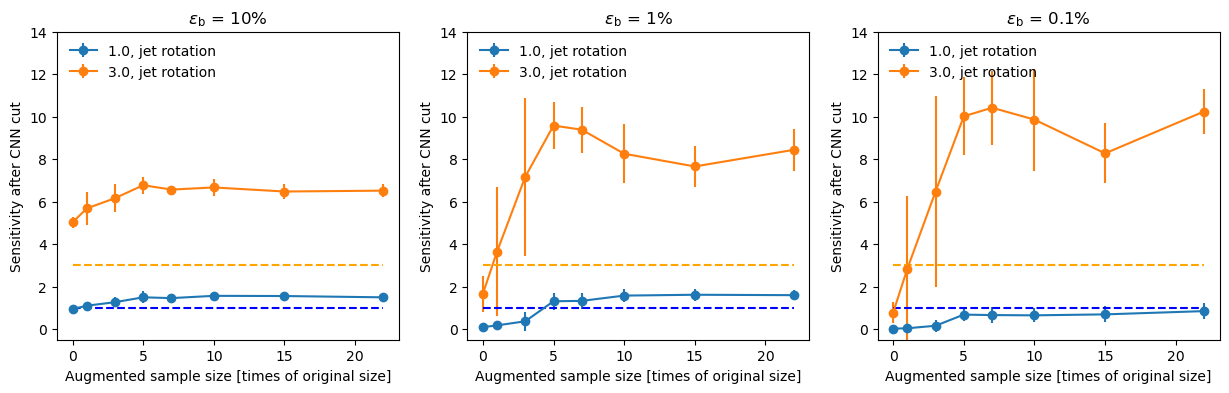

In [6]:
sample_size = [1, 3, 5, 7, 10, 15, 22]

models = ['SB_1.0_25x25'] + [f'SB_1.0_jet_aug_{n}_25x25' for n in sample_size]
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=1.0)

models = ['SB_3.0_25x25'] + [f'SB_3.0_jet_aug_{n}_25x25' for n in sample_size]
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std_from_models(models, sensitivity=3.0)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='1.0, jet rotation')
    ax[i].errorbar([0] + sample_size, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='3.0, jet rotation')

    ax[i].set_title(titles[i])
    ax[i].hlines(1, 0, 22, color='b', linestyle='--')
    ax[i].hlines(3, 0, 22, color='orange', linestyle='--')
    ax[i].set_ylim(-0.5, 14)
    ax[i].set_xlabel('Augmented sample size [times of original size]')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_jet_aug_SB_1_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

## $p_\text{T}$ smearing + jet rotation 

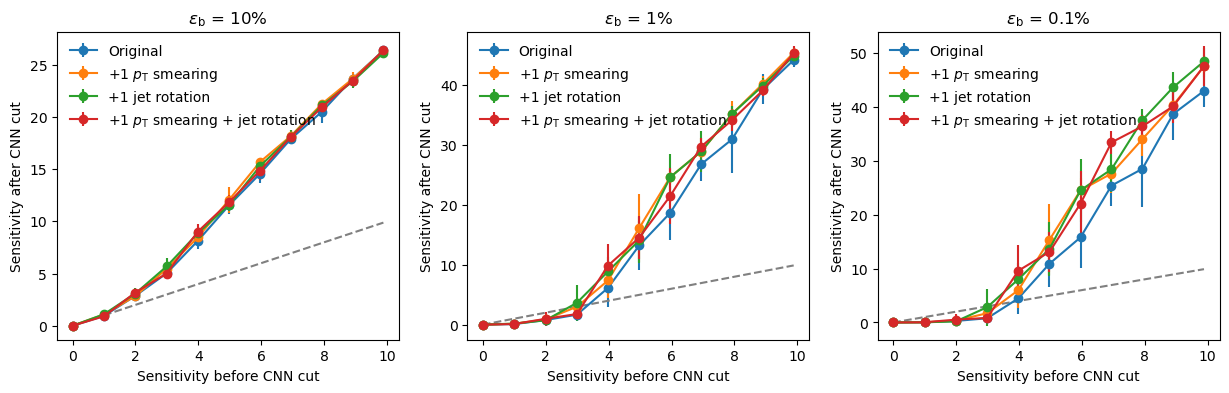

In [5]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_jet_aug_1, stds_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_1_25x25')
sensitivities_pt_aug_1, stds_pt_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_1_25x25')
sensitivities_pt_jet_aug_1, stds_pt_jet_aug_1 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_1_25x25')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_1[i], yerr=stds_pt_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_1[i], yerr=stds_jet_aug_1[i], marker='o', label='+1 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_1[i], yerr=stds_pt_jet_aug_1[i], marker='o', label='+1 $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_jet_aug_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

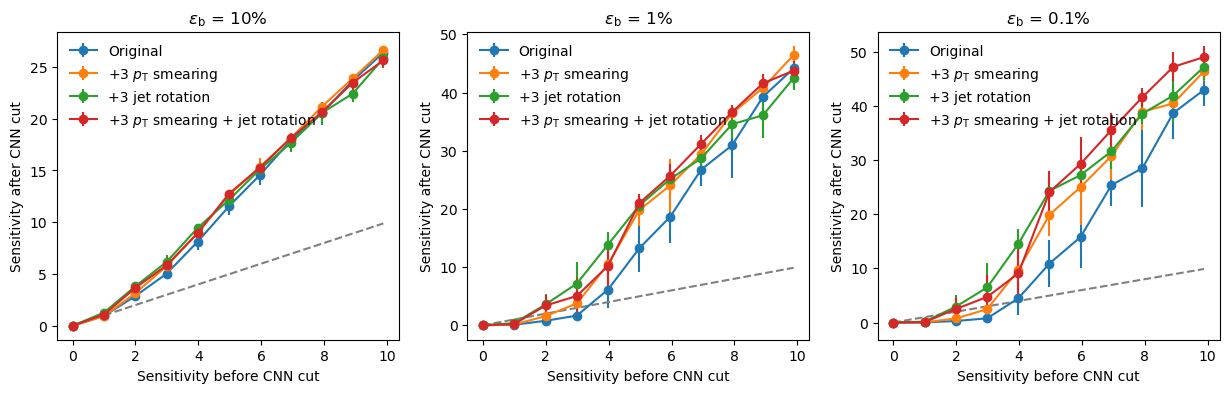

In [6]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_25x25')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_25x25')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_25x25')
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_3_25x25')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_jet_aug_3_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

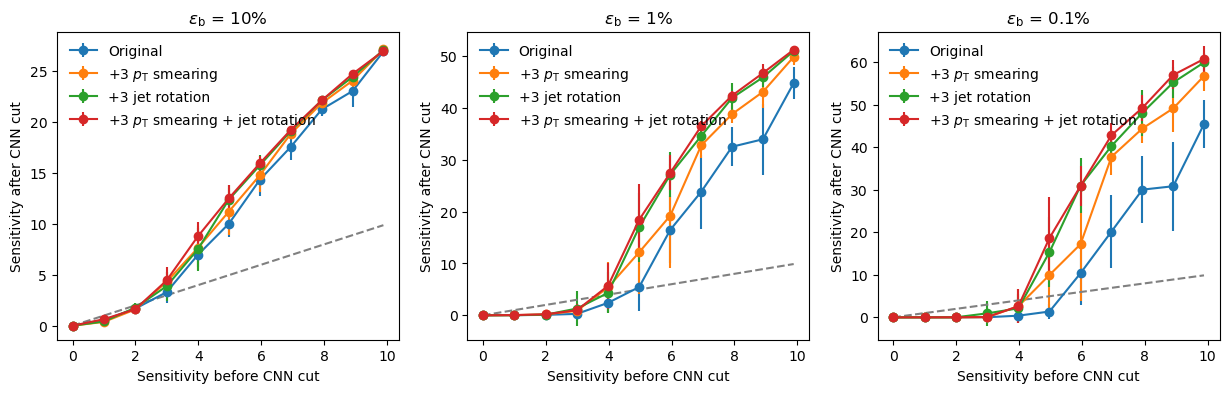

In [7]:
sensitivities_origin, stds_origin = get_realistic_sensitivity_and_std('SB_{:.1f}_75x75')
sensitivities_jet_aug_3, stds_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_jet_aug_3_75x75')
sensitivities_pt_aug_3, stds_pt_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pt_aug_3_75x75')
sensitivities_pt_jet_aug_3, stds_pt_jet_aug_3 = get_realistic_sensitivity_and_std('SB_{:.1f}_pT_jet_aug_3_75x75')


sensitivities = convert_to_realistic_sensitivity(np.arange(11), nB=n_bkg_in_SR)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

titles = ['$\epsilon_\mathrm{b}$ = 10%', '$\epsilon_\mathrm{b}$ = 1%', '$\epsilon_\mathrm{b}$ = 0.1%']
for i in range(3):

    ax[i].errorbar(sensitivities, sensitivities_origin[i], yerr=stds_origin[i], marker='o', label='Original')
    ax[i].errorbar(sensitivities, sensitivities_pt_aug_3[i], yerr=stds_pt_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing')
    ax[i].errorbar(sensitivities, sensitivities_jet_aug_3[i], yerr=stds_jet_aug_3[i], marker='o', label='+3 jet rotation')
    ax[i].errorbar(sensitivities, sensitivities_pt_jet_aug_3[i], yerr=stds_pt_jet_aug_3[i], marker='o', label='+3 $p_\mathrm{T}$ smearing + jet rotation')

    ax[i].plot(sensitivities, sensitivities, '--', color='grey')

    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Sensitivity before CNN cut')
    ax[i].set_ylabel('Sensitivity after CNN cut')

    ax[i].legend(frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_sensitivity_improvement_origin_pt_jet_aug_3_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()